#The LSTM task to predict next 50 steps based on 100 first steps.

#Exploratory Data Analysis (EDA)

Loading and preprocessing

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from google.colab import files
uploaded = files.upload()

this_seq_train = np.loadtxt('this_seq_train.csv', delimiter=',')
other_seqs = np.loadtxt('other_seqs.csv', delimiter=',')

Saving other_seqs.csv to other_seqs.csv
Saving simulateBlowfly.py to simulateBlowfly.py
Saving this_seq_train.csv to this_seq_train.csv


In [5]:
def plot_curve(data, title="Time Series Data"):
    plt.figure(figsize=(10, 5))
    plt.plot(data, label='Sequence')
    plt.xlabel('Time')
    plt.ylabel('Population')
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.show()

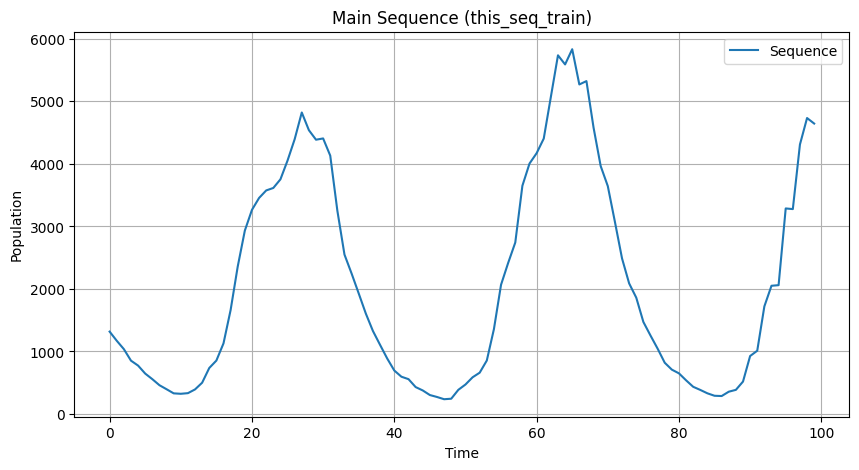

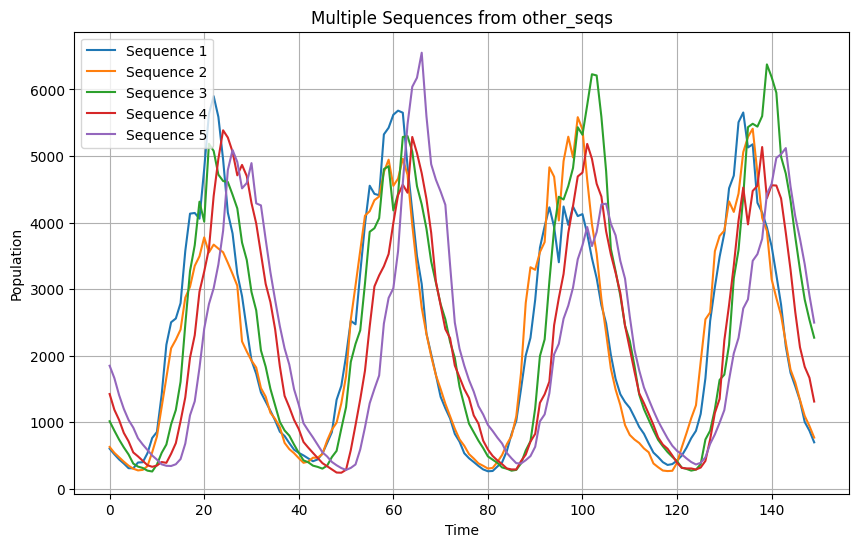

In [6]:

plot_curve(this_seq_train, title="Main Sequence (this_seq_train)")


plt.figure(figsize=(10, 6))
for i in range(5):
    plt.plot(other_seqs[i], label=f'Sequence {i+1}')
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Multiple Sequences from other_seqs')
plt.legend()
plt.grid()
plt.show()

In [11]:

this_seq_train = np.loadtxt('this_seq_train.csv', delimiter=',')
other_seqs = np.loadtxt('other_seqs.csv', delimiter=',')

# LSTM Model

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - loss: 0.2445 - val_loss: 0.1372
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.2026 - val_loss: 0.1172
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.1632 - val_loss: 0.0980
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.1066 - val_loss: 0.0803
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0992 - val_loss: 0.0645
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0751 - val_loss: 0.0545
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0527 - val_loss: 0.0507
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0531 - val_loss: 0.0487
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0543 - val_loss: 0.0477
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0495 - val_loss: 0.0470
Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0424 - val_loss: 0.0470
Epoch 12/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0437 - val_loss: 0.0441
Epoch 13/50


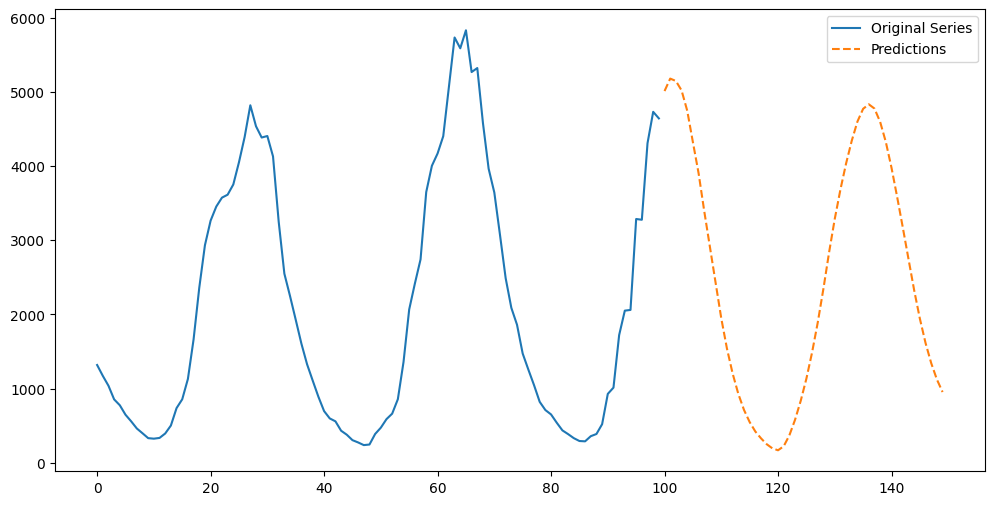

In [63]:
#mporting Libraries and Preprocessing
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt


from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
this_seq_train_scaled = scaler.fit_transform(this_seq_train.reshape(-1, 1)).flatten()


def create_univariate_dataset(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i + window_size])  # Past values
        y.append(data[i + window_size])   # Next value
    return np.array(X), np.array(y)

window_size = 10
X, y = create_univariate_dataset(this_seq_train_scaled, window_size)


X = X.reshape((X.shape[0], X.shape[1], 1))

#spliting data
train_size = int(len(X) * 0.8)
X_train, X_val = X[:train_size], X[train_size:]
y_train, y_val = y[:train_size], y[train_size:]

#Defining the LSTM model
model = Sequential([
    LSTM(64, activation='relu', input_shape=(window_size, 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

#Training the model
model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_val, y_val), verbose=1)

#Predicting the next 50 steps
predictions = []
seed = this_seq_train_scaled[-window_size:]

for _ in range(50):
    seed_reshaped = seed.reshape((1, window_size, 1))
    next_step = model.predict(seed_reshaped, verbose=0)
    predictions.append(next_step[0, 0])
    seed = np.append(seed[1:], next_step[0, 0])


predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1)).flatten()


plt.figure(figsize=(12, 6))
plt.plot(np.arange(len(this_seq_train)), this_seq_train, label="Original Series")
plt.plot(np.arange(len(this_seq_train), len(this_seq_train) + 50), predictions, label="Predictions", linestyle="dashed")
plt.legend()
plt.show()

In [58]:
np.savetxt('this_seq_pred_LSTM.csv', predictions, delimiter=',')
from google.colab import files
files.download('this_seq_pred_LSTM.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# LSTM loner time

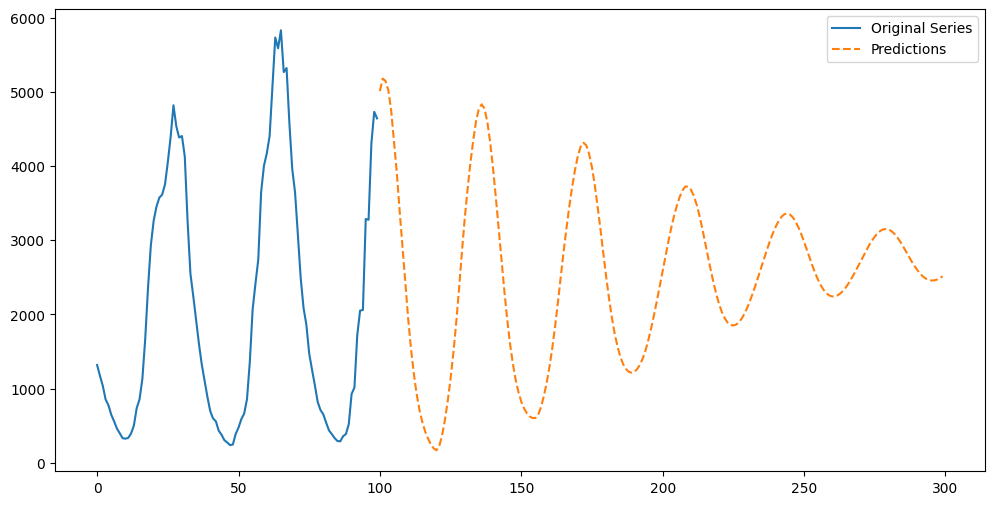

In [64]:

predictions = []
seed = this_seq_train_scaled[-window_size:]

for _ in range(200):
    seed_reshaped = seed.reshape((1, window_size, 1))
    next_step = model.predict(seed_reshaped, verbose=0)
    predictions.append(next_step[0, 0])
    seed = np.append(seed[1:], next_step[0, 0])


predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1)).flatten()


plt.figure(figsize=(12, 6))
plt.plot(np.arange(len(this_seq_train)), this_seq_train, label="Original Series")
plt.plot(np.arange(len(this_seq_train), len(this_seq_train) + 200), predictions, label="Predictions", linestyle="dashed")
plt.legend()
plt.show()


similar to the predictions of ARIMA, the decay becomes more noticable over time.

# LSTM with other_seqs

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 266ms/step - loss: 128414880.0000 - val_loss: 643897600.0000
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 2349860352.0000 - val_loss: 30910288.0000
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 2817396992.0000 - val_loss: 88797320.0000
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 272762880.0000 - val_loss: 124488128.0000
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 185401376.0000 - val_loss: 34939436.0000
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 519772096.0000 - val_loss: 63689740.0000
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - loss: 543250304.0000 - val_loss: 57274584.0000
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 3375888384.0000 - val_loss: 21542646.0000
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 4107488768.0000 - val_loss: 27222032.0000
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 652723584.0000 - val_loss: 53450216.0000
Epoch 11/100
3

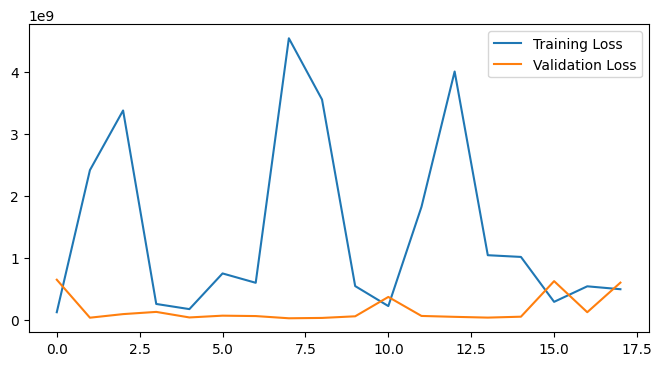

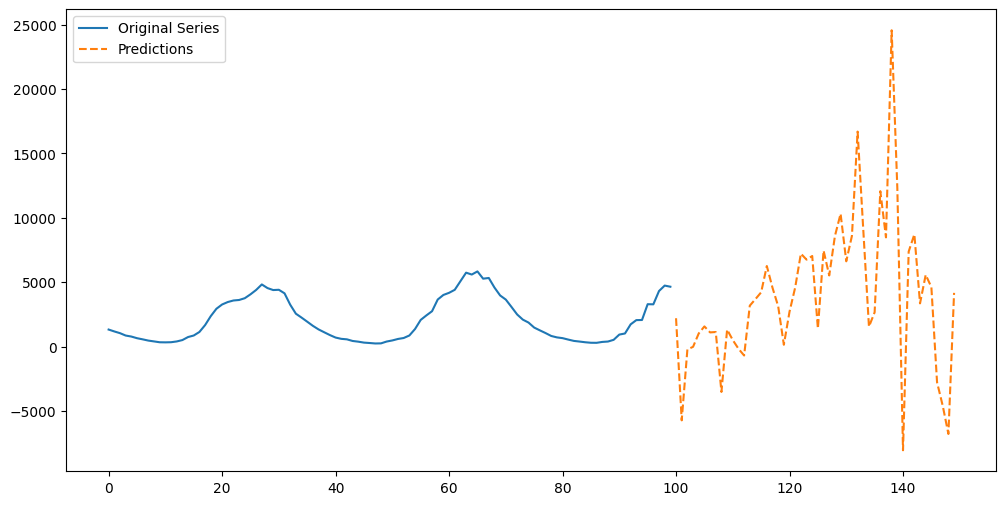

In [62]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


pca = PCA(n_components=10)
reduced_other_seqs = pca.fit_transform(other_seqs.T).T
aligned_other_seqs = reduced_other_seqs[:, :100].T

combined_features = np.hstack([this_seq_train.reshape(-1, 1), aligned_other_seqs])


def create_multivariate_dataset(data, target, window_size):
    X, y = [], []
    for i in range(len(target) - window_size):
        X.append(data[i:i + window_size])
        y.append(target[i + window_size])
    return np.array(X), np.array(y)

window_size = 50
X, y = create_multivariate_dataset(combined_features, this_seq_train, window_size)


train_size = int(len(X) * 0.8)
X_train, X_val = X[:train_size], X[train_size:]
y_train, y_val = y[:train_size], y[train_size:]


model = Sequential([
    LSTM(128, activation='relu', return_sequences=True, input_shape=(window_size, X.shape[2])),
    Dropout(0.3),
    LSTM(64, activation='relu'),
    Dropout(0.3),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')


from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    epochs=100, batch_size=16,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping],
    verbose=1
)


plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()


predictions = []
seed = combined_features[-window_size:]

for _ in range(50):
    seed_reshaped = seed.reshape((1, window_size, X.shape[2]))
    next_step = model.predict(seed_reshaped, verbose=0)
    predictions.append(next_step[0, 0])


    if len(predictions) > 1:
        predictions[-1] = 0.5 * predictions[-1] + 0.5 * predictions[-2]


    next_other_features = aligned_other_seqs[-1].reshape(1, -1)
    next_features = np.hstack([next_step[0], next_other_features.flatten()])
    seed = np.vstack([seed[1:], next_features])  # Update seed


plt.figure(figsize=(12, 6))
plt.plot(np.arange(len(this_seq_train)), this_seq_train, label="Original Series")
plt.plot(np.arange(len(this_seq_train), len(this_seq_train) + 50), predictions, label="Predictions",   linestyle="dashed")
plt.legend()
plt.show()
